In [19]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install pandas
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fake_news_detection_dataset (1).csv')

In [21]:
#install libraries

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
nltk.download('stopwords')
from wordcloud import WordCloud
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:

df.head() # afficher les 5 premières lignes

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [23]:
df.tail() # afficher les 5 dernières lignes

,Labels,Text,Text_Tag
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"
10238,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy"
10239,4,The Department of Veterans Affairs has a manua...,"health-care,veterans"


In [25]:
df.shape

(10240, 3)

In [26]:
df.Labels.value_counts()

2    2114
1    1995
3    1962
5    1676
0    1654
4     839
Name: Labels, dtype: int64

On vérifie avec .describe() si on a bien 10240 données :

In [27]:
df.describe(include='all')

,Labels,Text,Text_Tag
count,10240.000000,10240,10238
unique,NaN,10223,3827
top,NaN,On changing the rules for filibusters on presi...,health-care
freq,NaN,3,381
mean,2.328613,NaN,NaN
std,1.650933,NaN,NaN
min,0.000000,NaN,NaN
25%,1.000000,NaN,NaN
50%,2.000000,NaN,NaN
75%,3.000000,NaN,NaN


In [28]:
df.sample(10)

,Labels,Text,Text_Tag
2211,1,I was pretty proud of being the only guy on th...,candidates-biography
2573,1,The cheerleaders for the Dallas Cowboys have e...,"corrections-and-updates,military"
1672,5,Says he followed state law and the precedent o...,"job-accomplishments,new-hampshire-2012,transpa..."
1979,1,200 consumer laws were destroyed in 2011 when ...,"consumer-safety,legal-issues"
2442,1,House Republicans just passed a bill that make...,"congress,women"
5110,4,Gov. Scott Walker and the Republican-controlle...,"health-care,small-business,taxes"
9207,1,"Fully inflating tires is ""a step that every ex...",energy
241,5,Says you need a photo ID to purchase Sudafed i...,"elections,legal-issues"
5322,5,"Seneca Jones Timber Co., aiming to increase lo...","environment,jobs"
5097,0,Women in the United States are paid about 70 p...,"jobs,women"


2    2114
1    1995
3    1962
5    1676
0    1654
4     839
Name: Labels, dtype: int64


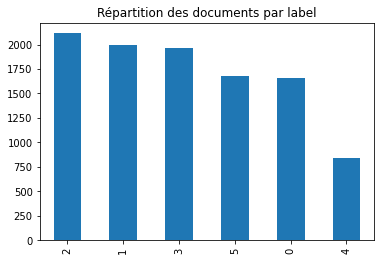

In [29]:
repartition_numbers = df['Labels'].value_counts()
print(repartition_numbers)
repartition_numbers.plot.bar(title = 'Répartition des documents par label')


In [1]:
#painting the data 
def paint_data(df):
  df.groupby('Labels').Labels.count().plot(kind = 'bar')
  plt.xlabel('Labels', fontweight='bold', color = 'orange', fontsize='18')
  bars = ('Barely-True','False','Half-True','Mostly-True','Not-Known','True')
  y_pos = np.arange(len(bars))
  plt.xticks(y_pos, bars, color='black', rotation = 45)

  plt.show()

In [2]:
#def clean_data(X_train,X_test):
  stemmer = PorterStemmer()
  words = stopwords.words("english")
  #Removing nan values, stop words and puntuation.  
  #Stemming is the process of reducing inflection in words to their root.
  train = pd.read_csv(X_train)
  test = pd.read_csv(X_test)
  train.dropna(inplace=True)
  train.drop_duplicates(inplace=True)
  test.dropna(inplace=True)
  test.drop_duplicates(inplace=True)
  df = pd.concat([train, test]).reset_index(drop=True)
  df['Text_cleaned'] = df['Text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  df['tag_cleaned'] = df['Text_Tag'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

  # df['Text_and_tag'] = df.Text +' '+ df.Text_Tag
  # df['Text_and_tag_cleaned'] = df['Text_and_tag'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  train = df[:train.shape[0]]
  test = df[train.shape[0]:]
  return train, test, df

def clean_data_fusion(X_train,X_test):
  stemmer = PorterStemmer()
  words = stopwords.words("english")
  #Removing nan values, stop words and puntuation.  
  #Stemming is the process of reducing inflection in words to their root.
  train = pd.read_csv(X_train)
  test = pd.read_csv(X_test)
  train.dropna(inplace=True)
  train.drop_duplicates(inplace=True)
  test.dropna(inplace=True)
  test.drop_duplicates(inplace=True)
  df = pd.concat([train, test]).reset_index(drop=True)
  df['Text_cleaned'] = df['Text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  df['tag_cleaned'] = df['Text_Tag'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

  df['Text_and_tag'] = df.Text_cleaned +' '+ df.tag_cleaned
  df['Text_and_tag_cleaned'] = df['Text_and_tag'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  train = df[:train.shape[0]]
  test = df[train.shape[0]:]
  return train, test, df

IndentationError: ignored

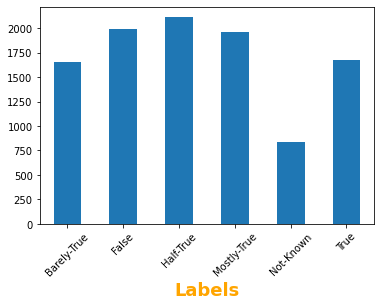

In [ ]:
paint_data(df)

In [ ]:

# Split the data by column to input and output.
x = df['Text']
y = df['Labels']

In [ ]:
x

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Text, Length: 10240, dtype: object

In [ ]:
y

0        1
1        2
2        3
3        1
4        2
        ..
10235    3
10236    3
10237    2
10238    1
10239    4
Name: Labels, Length: 10240, dtype: int64

In [ ]:
# Split the x and y into 80% train data and 20% test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
x_train

2929    In Florida, when Jeb Bush was governor, state ...
7646    President Obamas health care law says when you...
4560    Despite touting the economic stimulus as a gre...
3140    Says U.S. Rep. Connie Mack took seven and a ha...
9530    Says Scott Walker left college under an ethica...
                              ...                        
350     Most young Americans right now, theyre not cov...
79      I think it is unacceptable for the Chinese tod...
8039    In Wisconsin, 300,000 voters were turned away ...
6936    The Obama administration is "cutting back on d...
5640    Weve had the lowest health care inflation in h...
Name: Text, Length: 8192, dtype: object

In [ ]:
y_train

1147    2
2326    0
7959    2
9263    0
2946    3
       ..
562     3
8101    2
6538    2
6462    5
205     0
Name: Labels, Length: 8182, dtype: int64

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# stop_words = 'english': Removes all common uninformative words like and, the, etc.
# max_df = 0.7 : Removes corpus-specific stop words when the document frequecy is above 0.7. 
tf_idf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# fit_transform - Learns the terms and returns a document-term sparce matrix (n_samples, n_features)
tf_idf_x_train = tf_idf_vectorizer.fit_transform(x_train)

# transform - Returns a document-term sparce matrix (n_samples, n_features)
tf_idf_x_test = tf_idf_vectorizer.transform(x_test)

2.- Pre-process the textual data: use the pre-processing that worked best for you in the previous
experiments

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy
import string
nlp = spacy.load("en_core_web_sm") # charge le modèle en anglais

spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS) # la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # une liste avec ponctuations

spacy_stopwords[:10], punctuation[:10]

(['it',
  'something',
  'out',
  'whither',
  'together',
  'next',
  'yourself',
  'by',
  'thru',
  'thence'],
 ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'])

In [ ]:
def preprocess(news):
    
    tokens = [word.text.replace('\n', '').strip() for word in nlp(news) 
              if word.text.lower() not in spacy_stopwords + punctuation]
    tokens = [token for token in tokens if len(token) > 1]
    if len(tokens) > 1:
        return tokens
    return None

df['cleaned_text'] = df['Text'].apply(preprocess)

In [ ]:
df.head() # visualisez les donnees apres pre-traitement

,Labels,Text,Text_Tag,cleaned_text
0,1,Says the Annies List political group supports ...,abortion,"[Says, Annies, List, political, group, support..."
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments","[decline, coal, start, started, natural, gas, ..."
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,"[Hillary, Clinton, agrees, John, McCain, votin..."
3,1,Health care reform legislation is likely to ma...,health-care,"[Health, care, reform, legislation, likely, ma..."
4,2,The economic turnaround started at the end of ...,"economy,jobs","[economic, turnaround, started, end, term]"


In [ ]:
df['cleaned_text'][0][:10]

['Says',
 'Annies',
 'List',
 'political',
 'group',
 'supports',
 'trimester',
 'abortions',
 'demand']

In [ ]:
df['cleaned_text'].isnull().sum()

12

In [ ]:
df.dropna(subset=['cleaned_text'], inplace=True)

In [ ]:
df['cleaned_text'].isnull().sum()

0

In [ ]:
len(df)

10228

In [ ]:
df['document_length'] = df['cleaned_text'].apply(lambda tokens: len(tokens))

In [ ]:
df['document_length'].head()

0     9
1    14
2    11
3    10
4     5
Name: document_length, dtype: int64

In [ ]:
max(df['document_length'])

331

In [ ]:
df.sort_values('document_length', inplace=True)
df.head()

,Labels,Text,Text_Tag,cleaned_text,document_length
794,1,On an earmark moratorium.,federal-budget,"[earmark, moratorium]",2
8481,1,On switching parties.,elections,"[switching, parties]",2
2009,1,On the Cuba embargo.,"congress,florida,foreign-policy,trade","[Cuba, embargo]",2
3520,2,On abortion rights.,abortion,"[abortion, rights]",2
1424,1,What they will do is socialized medicine.,health-care,"[socialized, medicine]",2


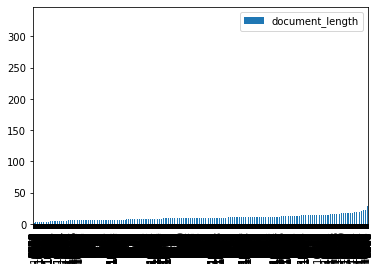

In [ ]:
_ = df.plot(y='document_length', kind='bar')

In [ ]:
!pip install nltk
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def preprocess_with_nltk(news):
    
    tokens = []
    
    # YOUR CODE HERE
    # Diviser les phrares en mots
    tokens = word_tokenize(news)
    
    # Conversion en minuscule
    tokens = [w.lower() for w in tokens]
    
    # Enlever les ponctuations de tous les mots
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # Enlever les tokens restants qui ne sont pas alphabétiques
    tokens = [word for word in stripped if word.isalpha()]
    
    # Filtrer les tokens qui sont des stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    tokens = [ word.replace('\n', '').strip() for word in word_tokenize(news)
              if word.lower() not in stopwords.words('english') + punctuation]
    tokens = [token for token in tokens if len(token)>1]

    if len(tokens) > 1:
        return tokens
    return None

df['cleaned_text_nltk'] = df['Text'].apply(preprocess_with_nltk)

In [ ]:
df.head()

,Labels,Text,Text_Tag,cleaned_text,document_length,cleaned_text_nltk
794,1,On an earmark moratorium.,federal-budget,"[earmark, moratorium]",2,"[earmark, moratorium]"
8481,1,On switching parties.,elections,"[switching, parties]",2,"[switching, parties]"
2009,1,On the Cuba embargo.,"congress,florida,foreign-policy,trade","[Cuba, embargo]",2,"[Cuba, embargo]"
3520,2,On abortion rights.,abortion,"[abortion, rights]",2,"[abortion, rights]"
1424,1,What they will do is socialized medicine.,health-care,"[socialized, medicine]",2,"[socialized, medicine]"


In [ ]:
import nltk
import numpy as np

freq = nltk.FreqDist(np.hstack(df['cleaned_text']))

In [ ]:
freq

FreqDist({'earmark': 9,
          'moratorium': 3,
          'switching': 2,
          'parties': 12,
          'Cuba': 13,
          'embargo': 4,
          'abortion': 98,
          'rights': 43,
          'socialized': 5,
          'medicine': 9,
          'considered': 10,
          'maverick': 1,
          'die': 26,
          'toothache': 1,
          'fact': 53,
          'amnesty': 28,
          'margin': 11,
          'error': 5,
          'gay': 41,
          'marriage': 43,
          'billions': 26,
          'surplus': 32,
          'Bridge': 15,
          'occur': 7,
          'Muslims': 25,
          'Cabinet': 4,
          'Farouk': 1,
          'fire': 34,
          'earmarks': 27,
          'going': 160,
          'Texans': 20,
          'millionaires': 28,
          'Immigrants': 3,
          'fertile': 1,
          'pro': 32,
          'life': 59,
          'sex': 56,
          'oil': 143,
          'drilling': 42,
          'said': 366,
          'child': 58,
      

On peut grâce à FreqDist récupérer les 40 termes les plus courants du corpus.

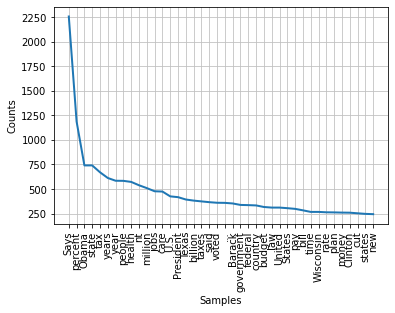

In [ ]:
_ = freq.plot(40, cumulative=False)

In [ ]:
import nltk
import numpy as np

list(nltk.ngrams(np.hstack(df['cleaned_text']), 2))[:10]

[('earmark', 'moratorium'),
 ('moratorium', 'switching'),
 ('switching', 'parties'),
 ('parties', 'Cuba'),
 ('Cuba', 'embargo'),
 ('embargo', 'abortion'),
 ('abortion', 'rights'),
 ('rights', 'socialized'),
 ('socialized', 'medicine'),
 ('medicine', 'considered')]

In [ ]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk

lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
print("corpora :", lemmatizer.lemmatize("corpora", pos="n"))
print("better : ", lemmatizer.lemmatize("better", pos=wordnet.ADJ))

corpora : corpus
better :  good


In [ ]:
def preprocess_with_nltk_and_lemmatisation(news):
    
    tokens = []                                                                       # YOUR CODE HERE
    
        # Tokeniser les mots tout en ignorant la ponctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(news)
    
    # Miniscule et lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Supprimer stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

    if len(tokens) > 1:
        return tokens
    return None

df['cleaned_text_nltk_and_lemmatisation'] = df['Text'].apply(preprocess_with_nltk_and_lemmatisation)

In [ ]:
df.head()

,Labels,Text,Text_Tag,cleaned_text,document_length,cleaned_text_nltk,cleaned_text_nltk_and_lemmatisation
794,1,On an earmark moratorium.,federal-budget,"[earmark, moratorium]",2,"[earmark, moratorium]","[earmark, moratorium]"
8481,1,On switching parties.,elections,"[switching, parties]",2,"[switching, parties]","[switch, party]"
2009,1,On the Cuba embargo.,"congress,florida,foreign-policy,trade","[Cuba, embargo]",2,"[Cuba, embargo]","[cuba, embargo]"
3520,2,On abortion rights.,abortion,"[abortion, rights]",2,"[abortion, rights]","[abortion, right]"
1424,1,What they will do is socialized medicine.,health-care,"[socialized, medicine]",2,"[socialized, medicine]","[socialize, medicine]"


In [ ]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

In [ ]:
print("stayed :", stemmer.stem("stayed"))
print("friends : ", stemmer.stem("friends"))
print("coming :", stemmer.stem("coming"))

stayed : stay
friends :  friend
coming : come


In [ ]:
def preprocess_with_nltk_and_stemming(news):
    
    tokens = []                                                                  # YOUR CODE HERE
def return_stem(news):
    doc = nlp(phrase)
    return [stemmer.stem(X.text) for X in doc]

    if len(tokens) > 1:
        return tokens
    return None

df['cleaned_text_nltk_and_stemming'] = df['Text'].apply(preprocess_with_nltk_and_stemming)

In [ ]:
df.head()

,Labels,Text,Text_Tag,cleaned_text,document_length,cleaned_text_nltk,cleaned_text_nltk_and_lemmatisation,cleaned_text_nltk_and_stemming
794,1,On an earmark moratorium.,federal-budget,"[earmark, moratorium]",2,"[earmark, moratorium]","[earmark, moratorium]",None
8481,1,On switching parties.,elections,"[switching, parties]",2,"[switching, parties]","[switch, party]",None
2009,1,On the Cuba embargo.,"congress,florida,foreign-policy,trade","[Cuba, embargo]",2,"[Cuba, embargo]","[cuba, embargo]",None
3520,2,On abortion rights.,abortion,"[abortion, rights]",2,"[abortion, rights]","[abortion, right]",None
1424,1,What they will do is socialized medicine.,health-care,"[socialized, medicine]",2,"[socialized, medicine]","[socialize, medicine]",None


In [ ]:
# Split the data by column to input and output.
x = df['Text']
y = df['Labels']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Labels'], test_size=0.2)
len(X_train), len(X_test)

(8182, 2046)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
_ = clf.fit(X_train_tfidf, y_train)

In [ ]:
print("Classes :",np.unique(df.Labels))

Classes : [0 1 2 3 4 5]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.01      0.02       335
           1       0.28      0.27      0.27       408
           2       0.23      0.53      0.32       440
           3       0.25      0.38      0.30       381
           4       0.00      0.00      0.00       149
           5       0.26      0.02      0.04       333

    accuracy                           0.24      2046
   macro avg       0.19      0.20      0.16      2046
weighted avg       0.22      0.24      0.19      2046



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
